In [1]:
import tensorflow as tf
import zfit
from zfit import z
import pandas as pd
import numpy as np

2022-03-30 14:27:42.927369: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-30 14:27:42.927459: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/root/envs/scientific/lib/python3.8/site-packages/zfit/__init__.py:37: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn("TensorFlow warnings are by default suppressed by zfit."


In [2]:
version = '9.0.0'
all = pd.read_csv(f'../data_files/{version}/all.csv', index_col=[0])
all.head()

,JPs_FD_ORIVX,LStar_ORIVX_CHI2,Lb_ENDVERTEX_CHI2,LN_Lb_IPCHI2_OWNPV,Lb_PT,LN_Lb_MINIPCHI2,LN_Lb_IP01,LN_Lb_IP23,LN_Lb_IP_OWNPV,p_TRACK_VeloCHI2NDOF,...,JPs_IP_TOPPV,LStar_IP_ORIVX,JPs_IP_ORIVX,LN_SUM_CONEISO,LN_SUM_IPCHI2,LN_COS_THETA,LN_COS_LBDIRA,Lb_M,IsSimulated,category
0,1.851979,28.907789,28.907789,2.193329,4230.809665,2.193329,-0.847595,-1.041318,-2.872736,0.594733,...,0.352945,0.085317,0.041645,0.265708,6.464721,-5.570637,-0.777264,3998.369168,False,0
1,0.085784,3.052172,3.052172,2.961534,8458.609810,2.961534,-1.916333,-2.378791,-2.722544,0.501596,...,0.092650,0.010171,0.004363,0.989021,5.767648,-4.412842,-0.777397,3908.707715,False,0
2,0.328561,31.440962,31.440962,1.192254,7521.502286,1.192254,-1.315165,-3.398239,-3.880958,0.961206,...,0.033464,0.064917,0.005629,0.546949,5.256708,-5.071058,-0.777203,3925.686564,False,0
3,0.292555,4.659895,4.659895,2.916038,4882.919930,2.916038,-0.328529,-0.747493,-2.750426,0.267760,...,0.473588,0.024150,0.016349,-0.544535,7.818096,-5.766520,-0.777214,4532.655292,False,0
4,0.276511,27.207298,27.207298,2.325226,9988.647107,2.325226,-1.274015,-2.394711,-2.658933,0.962834,...,0.091219,0.030870,0.026209,0.925614,7.154856,-4.088718,-0.777254,4394.754828,False,0


In [3]:
masses = all['Lb_M'][all['category']==1].to_numpy()
# Masses of signal candidate events

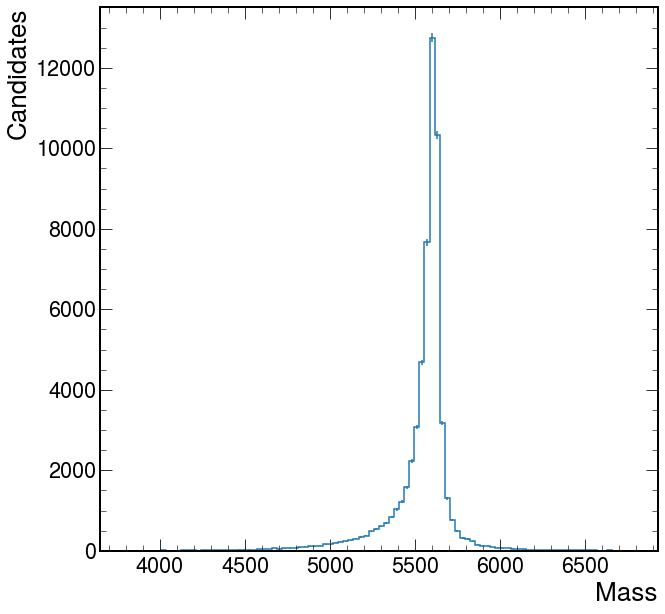

In [4]:
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])

h, bins = np.histogram(masses, bins=100)
fig, ax = plt.subplots(1, 1)
hep.histplot(h, yerr=np.sqrt(h), bins=bins, ax=ax)
plt.xlabel('Mass')
plt.ylabel('Candidates')
plt.show()
# Initial plot

In [5]:
obs = zfit.Space('x', limits=(np.min(masses), np.max(masses)))

2022-03-30 14:27:55.331851: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-30 14:27:55.332032: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-30 14:27:55.332078: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-0L9OF1GC): /proc/driver/nvidia/version does not exist
2022-03-30 14:27:55.332826: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
mu = zfit.Parameter("mu", 5610.0, 5500.0, 5700.0)
sigma = zfit.Parameter("sigma", 25, 15, 35)
alphal = zfit.Parameter("alphal", 1, -3, 3)
nl = zfit.Parameter("nl", 1, -3, 3)
alphar = zfit.Parameter("alphar", 1, -3, 3)
nr = zfit.Parameter("nr", 1, -3, 3)

In [7]:
dcb = zfit.pdf.DoubleCB(obs=obs, mu=mu, sigma=sigma, alphal=alphal, nl=nl,
alphar=alphar, nr=nr)
data = zfit.Data.from_numpy(obs=obs, array=masses)

In [8]:
nll = zfit.loss.UnbinnedNLL(model=dcb, data=data)
minimizer = zfit.minimize.Minuit()
result = minimizer.minimize(nll)

2022-03-30 14:27:58.409622: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [24]:
param_errors = result.errors()[0]
print(param_errors)

/root/envs/scientific/lib/python3.8/site-packages/zfit/minimizers/fitresult.py:1115: FutureWarning: 'minuit_minos' will be changed as the default errors method to a custom implementationwith the same functionality. If you want to make sure that 'minuit_minos' will be used in the future, add it explicitly as in `errors(method='minuit_minos')`
  warnings.warn("'minuit_minos' will be changed as the default errors method to a custom implementation"


OrderedDict([(<zfit.Parameter 'alphal' floating=True value=0.4458>, {'lower': -0.01331782458173972, 'upper': 0.012856267415529114, 'is_valid': True, 'upper_valid': True, 'lower_valid': True, 'at_lower_limit': False, 'at_upper_limit': False, 'nfcn': 94, 'original': <MError number=0 name='alphal' lower=-0.01331782458173972 upper=0.012856267415529114 is_valid=True lower_valid=True upper_valid=True at_lower_limit=False at_upper_limit=False at_lower_max_fcn=False at_upper_max_fcn=False lower_new_min=False upper_new_min=False nfcn=94 min=0.445830568825521>, 'cl': 0.68268949}), (<zfit.Parameter 'alphar' floating=True value=1.133>, {'lower': -0.0276417116247058, 'upper': 0.026693615791161574, 'is_valid': True, 'upper_valid': True, 'lower_valid': True, 'at_lower_limit': False, 'at_upper_limit': False, 'nfcn': 96, 'original': <MError number=1 name='alphar' lower=-0.0276417116247058 upper=0.026693615791161574 is_valid=True lower_valid=True upper_valid=True at_lower_limit=False at_upper_limit=Fals

In [10]:
print(f"Function minimum: {result.fmin}")
print(f"Converged: {result.converged}")
print(f"Valid: {result.valid}")

Function minimum: -12508.222776272623
Converged: True
Valid: True


In [11]:
# Information on all the parameters in the fit
print(result.params)

name      value         minuit_minos    at limit
------  -------  -------------------  ----------
alphal   0.4458  -  0.013   +  0.013       False
alphar    1.133  -  0.028   +  0.027       False
mu         5611  -    0.4   +   0.41       False
nl        2.637  -  0.034   +  0.035       False
nr        2.057  -  0.036   +  0.037       False
sigma     21.79  -   0.61   +   0.58       False


In [12]:
lower, upper = obs.limits
data_np = zfit.run(data.value()[:,0])

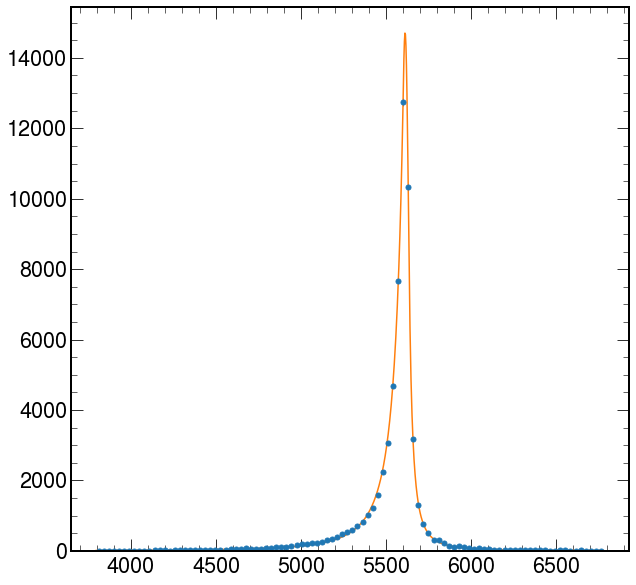

In [16]:
# plot the data as a histogramm
bins = 100
counts, bin_edges = np.histogram(data_np, bins, range=(lower[-1][0], upper[0][0]))
hep.histplot((counts, bin_edges), yerr=True, histtype='errorbar')

# evaluate the func at multiple x and plot
x_plot = np.linspace(lower[-1][0], upper[0][0], num=1000)
y_plot = zfit.run(dcb.pdf(x_plot, norm_range=obs))
plt.plot(x_plot, y_plot * data_np.shape[0] / bins * obs.area())
plt.show()